# Semantic segmentation of histopathological images with HER2 overexpression with U-Net

## Initial dataset (225 images and masks)

In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/01optimization_initial_dataset.csv')
bestf1 = df['F1-Score'].max()
multi = df.set_index(['Optimizer', 'Loss Function', 'Threshold', 'Learning rate', 'Epochs'])
multi['TP'] = multi['TP'].astype(int)
multi['FP'] = multi['FP'].astype(int)
multi['TN'] = multi['TN'].astype(int)
multi['FN'] = multi['FN'].astype(int)

def bold_style(val):
    f = 'font-weight: bold' 
    m = val['F1-Score'] == bestf1
    df1 = pd.DataFrame('', index=val.index, columns=val.columns)
    df1 = df1.mask(m, f)
    return df1

def bg_style(val):
    f = 'background-color: yellow' 
    m = val['F1-Score'] == bestf1
    df1 = pd.DataFrame('', index=val.index, columns=val.columns)
    df1 = df1.mask(m, f)
    return df1

indices_with_borders = range(0, len(multi), 2)
multi.style.apply(bg_style, axis=None).apply(bold_style, axis=None).set_properties(subset=(multi.index[indices_with_borders], multi.columns), **{
                      'border-width': '1px', "border-top-style":"solid"}).format({'Loss': "{:.3f}", 'Acc': "{:.3f}",
                                                                                 'Precision': "{:.3f}", 'Recall': "{:.3f}",
                                                                                 'F1-Score': "{:.3f}", 'Mean IoU': "{:.3f}",
                                                                                 'AUC': "{:.3f}"})


In [77]:
multi.loc[multi['F1-Score'] == multi['F1-Score'].max()]

Loss  \
Optimizer Loss Function     Threshold Learning rate Epochs             
Adam      Weighted BCE/Dice 0.5       0.001         50      0.359784   

                                                                 Acc  \
Optimizer Loss Function     Threshold Learning rate Epochs             
Adam      Weighted BCE/Dice 0.5       0.001         50      0.963146   

                                                            Precision  \
Optimizer Loss Function     Threshold Learning rate Epochs              
Adam      Weighted BCE/Dice 0.5       0.001         50       0.729037   

                                                              Recall  \
Optimizer Loss Function     Threshold Learning rate Epochs             
Adam      Weighted BCE/Dice 0.5       0.001         50      0.628258   

                                                            F1-Score  \
Optimizer Loss Function     Threshold Learning rate Epochs             
Adam      Weighted BCE/Dice 0.5       0.001         50      0.674906   

                                                            Mean IoU  \
Optimizer Loss Function     Threshold Learning rate Epochs             
Adam      Weighted BCE/Dice 0.5       0.001         50      0.735503   

                                                                 AUC     TP  \
Optimizer Loss Function     Threshold Learning rate Epochs                    
Adam      Weighted BCE/Dice 0.5       0.001         50      0.975932  28205   

                                                               FP      TN  \
Optimizer Loss Function     Threshold Learning rate Epochs                  
Adam      Weighted BCE/Dice 0.5       0.001         50      16689  681903   

                                                               FN  
Optimizer Loss Function     Threshold Learning rate Epochs         
Adam      Weighted BCE/Dice 0.5       0.001         50      10483

## Predicted masks visualization

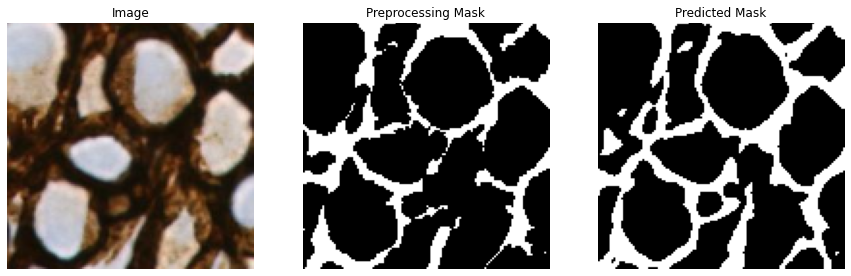

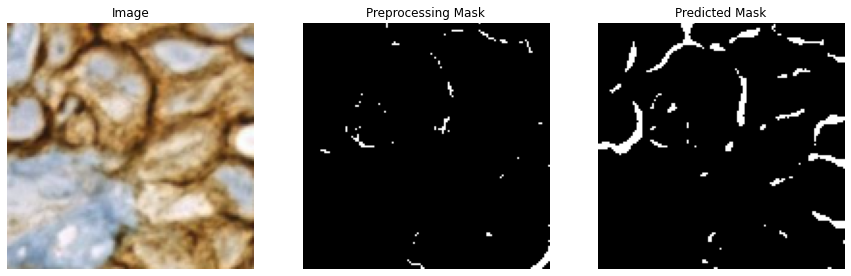

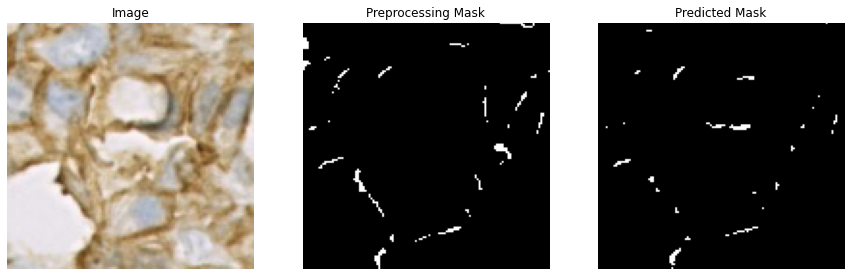

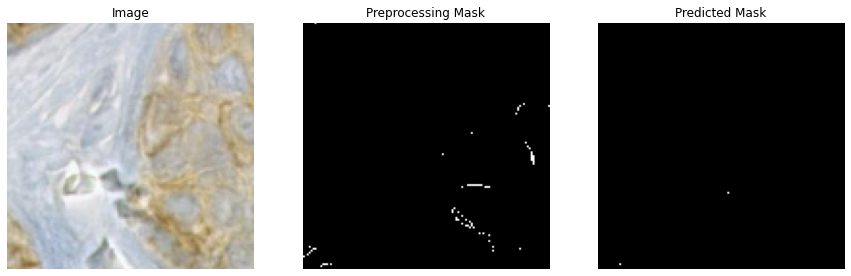

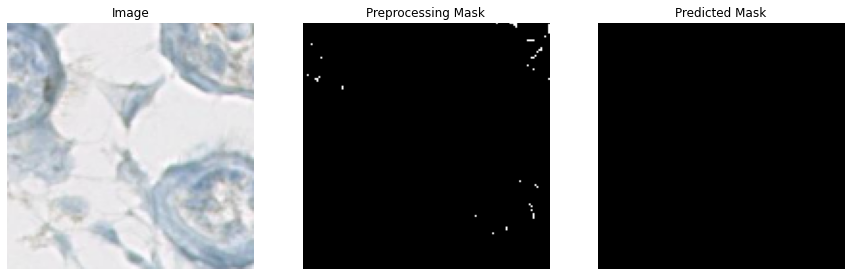

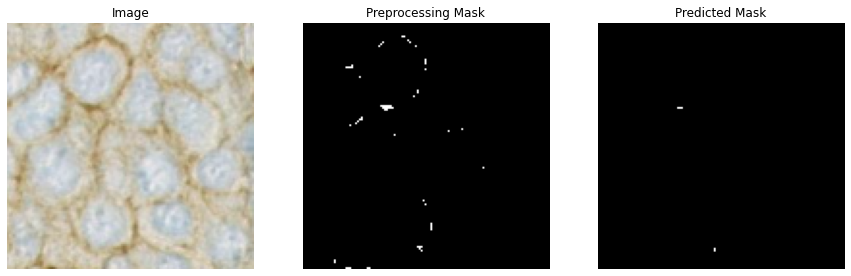

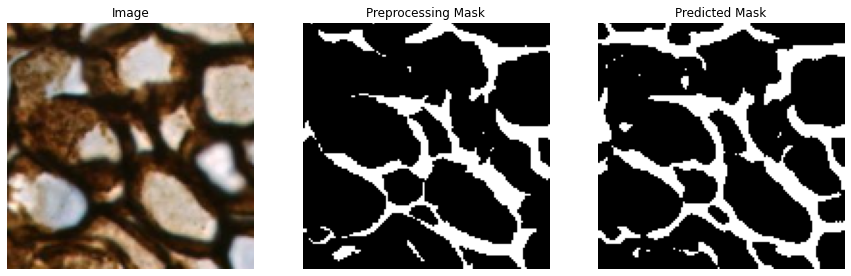

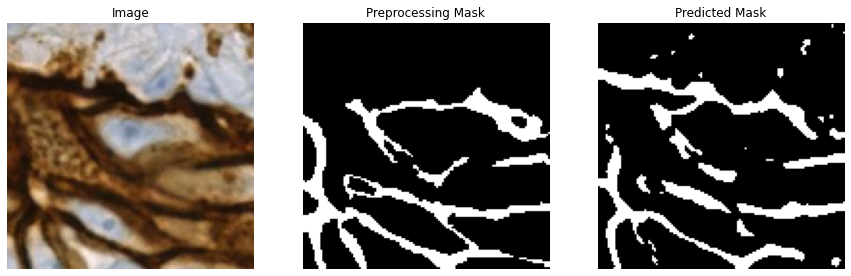

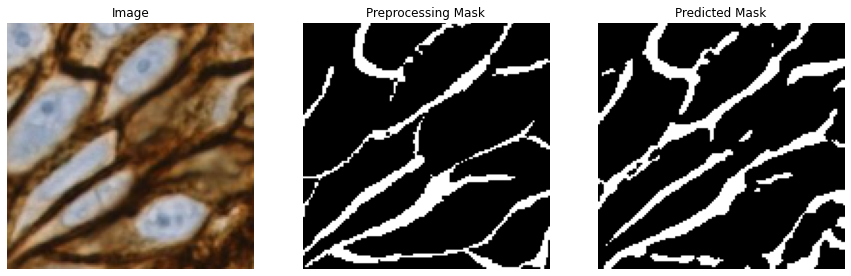

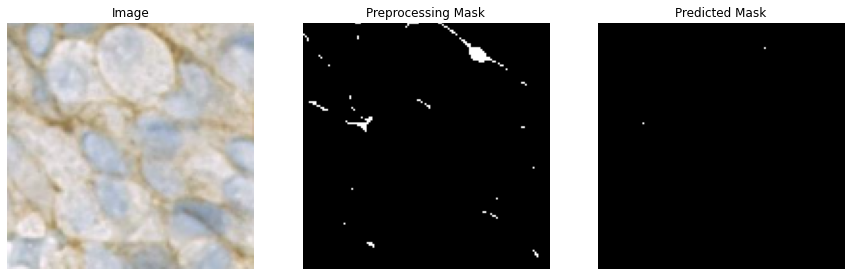

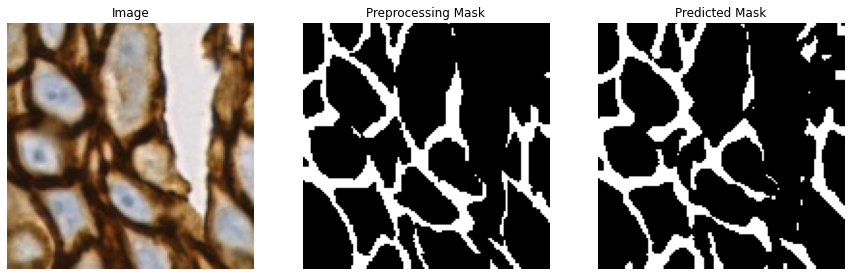

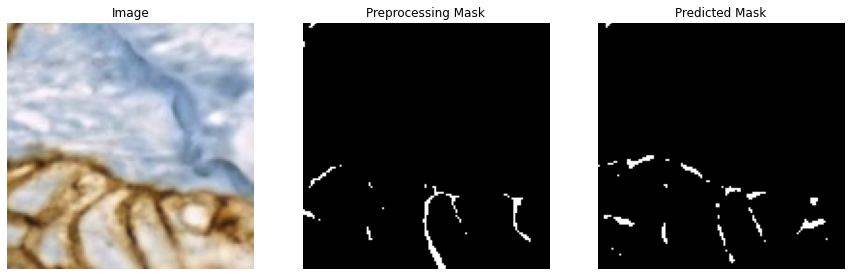

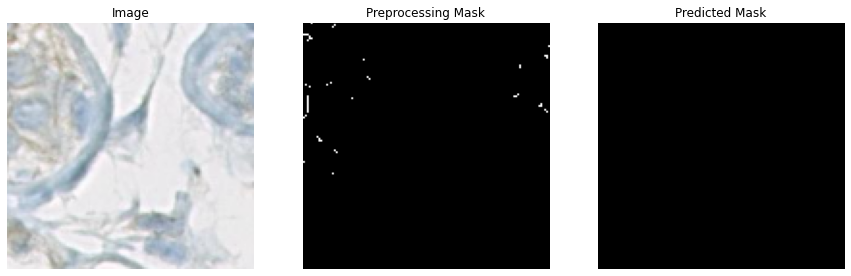

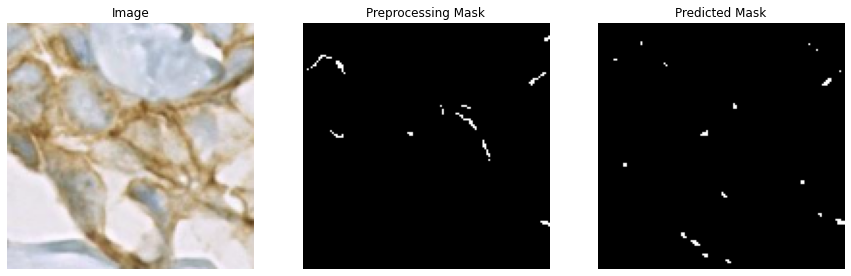

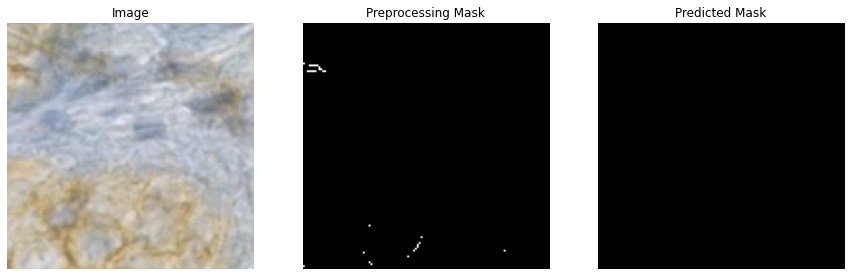

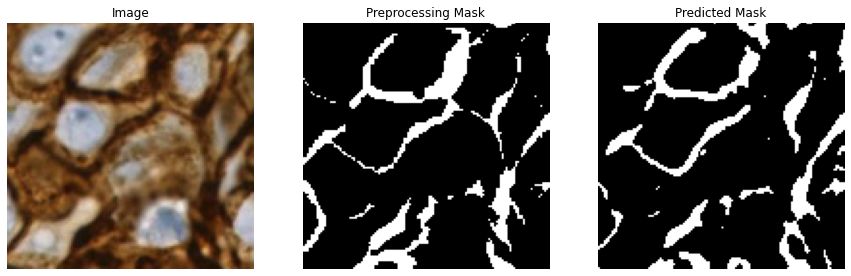

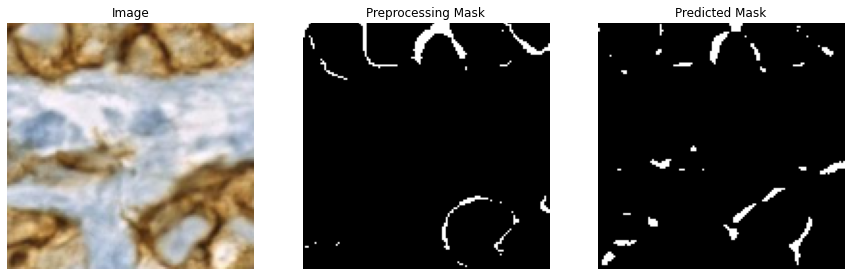

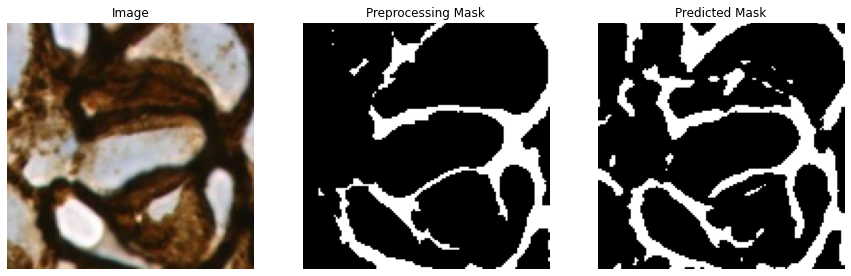

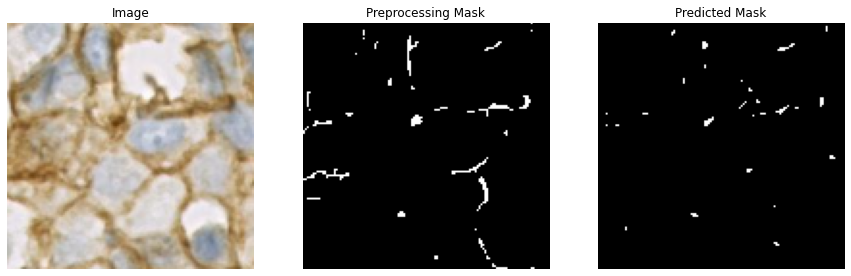

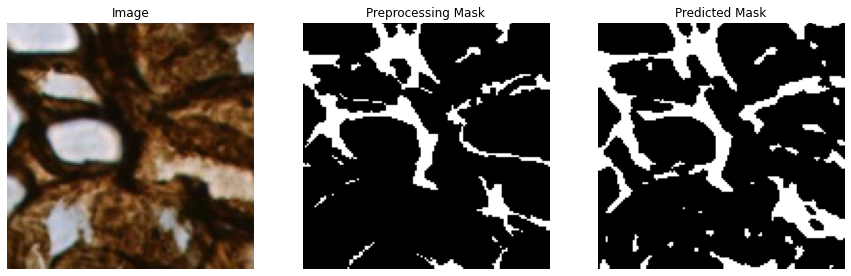

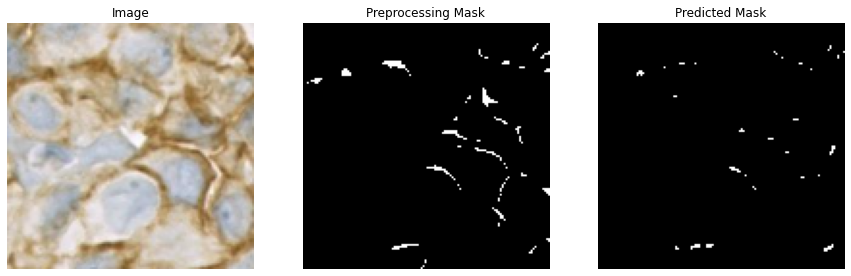

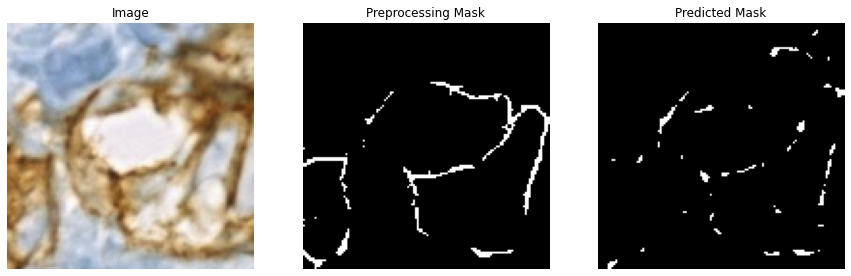

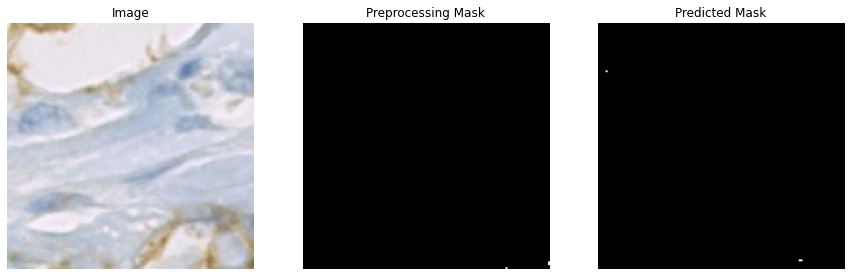

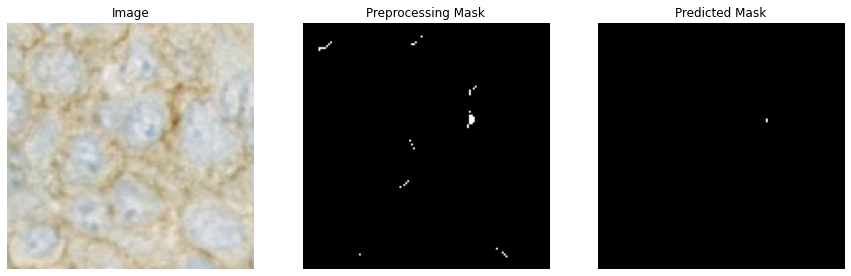

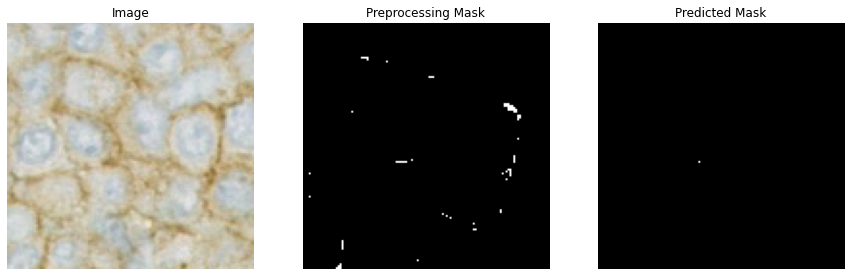

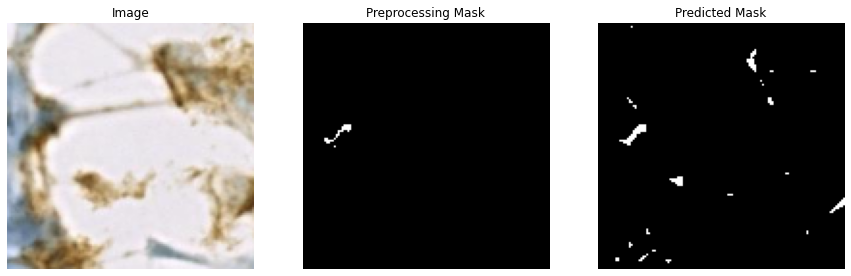

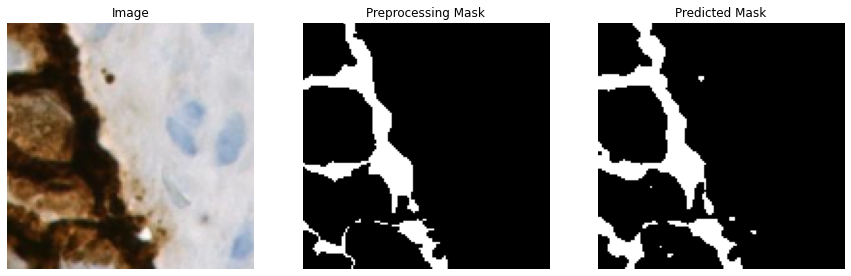

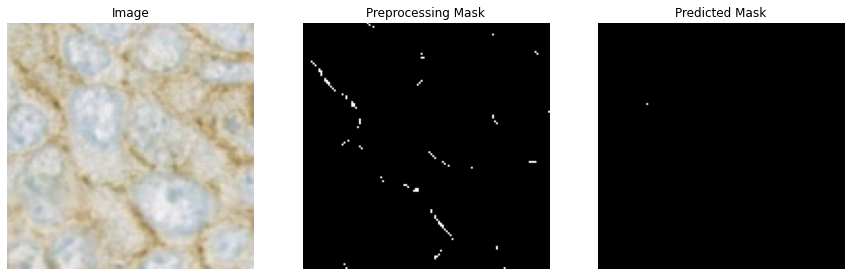

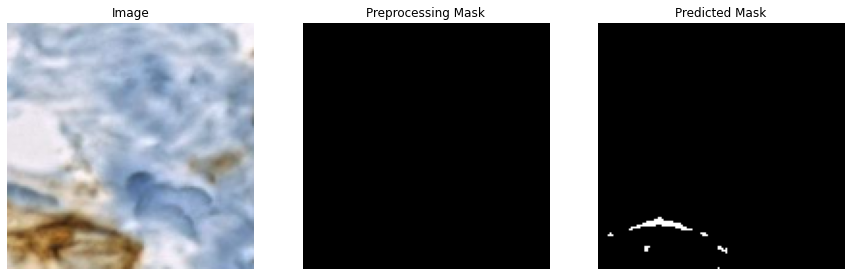

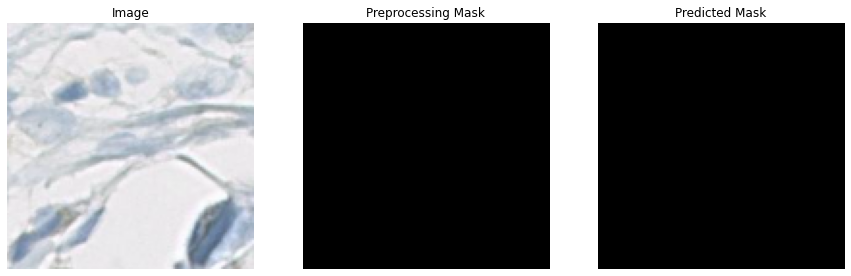

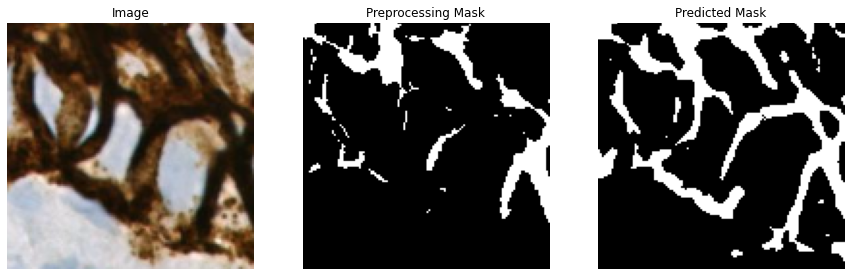

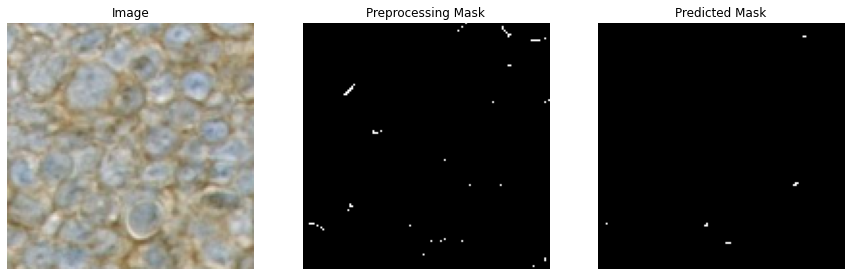

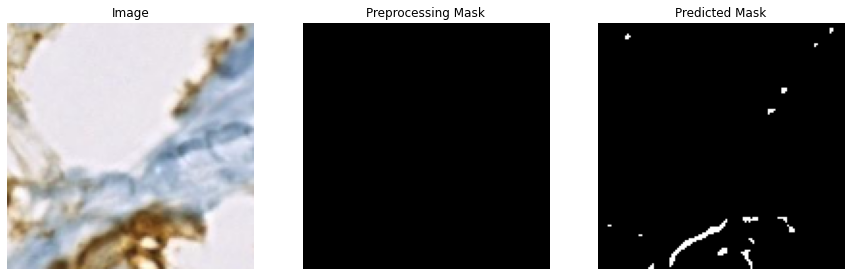

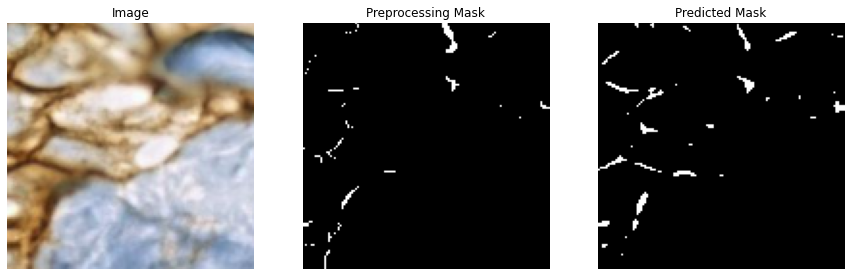

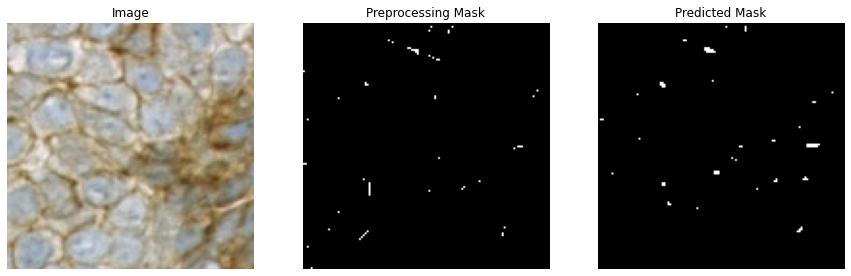

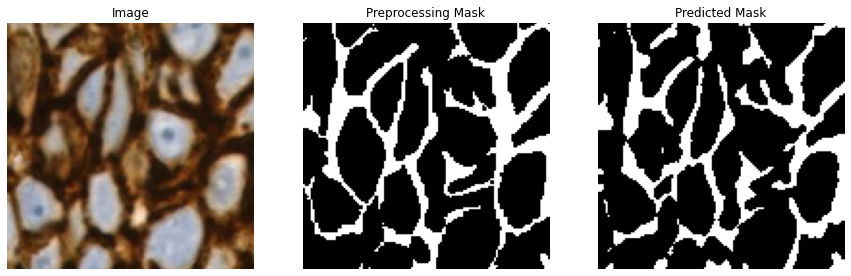

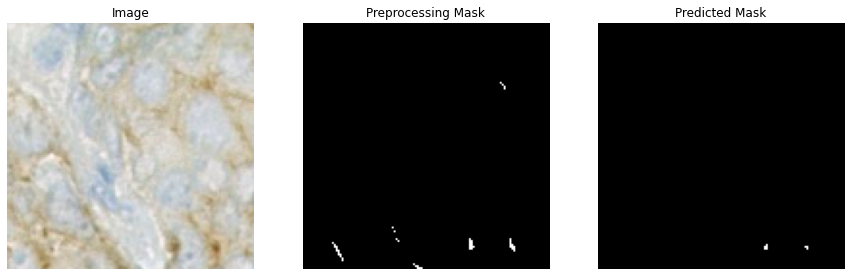

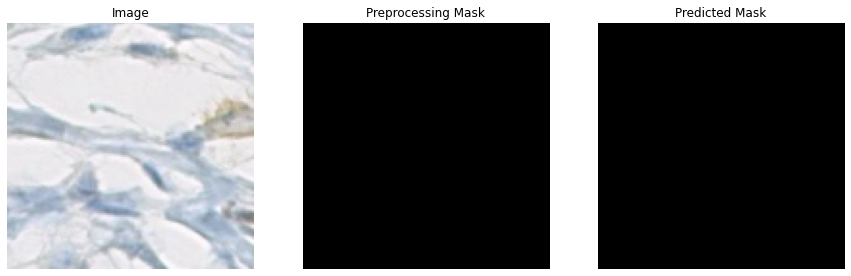

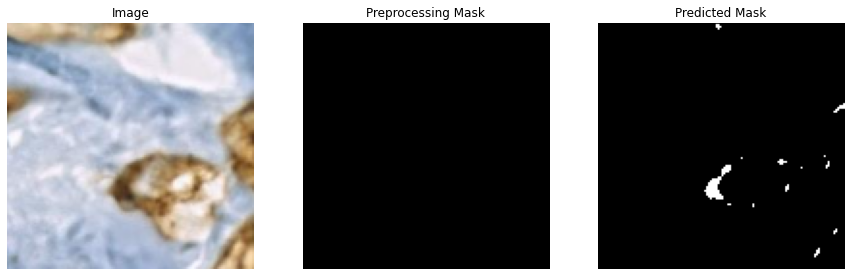

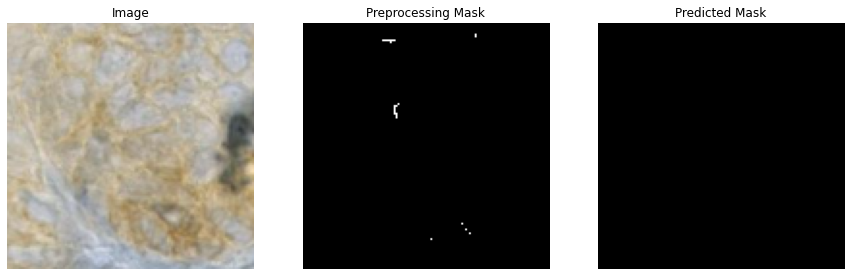

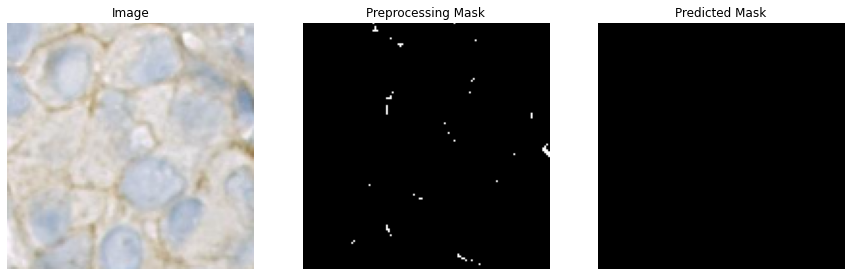

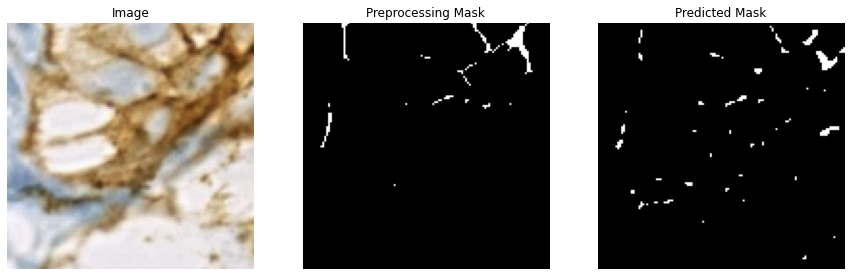

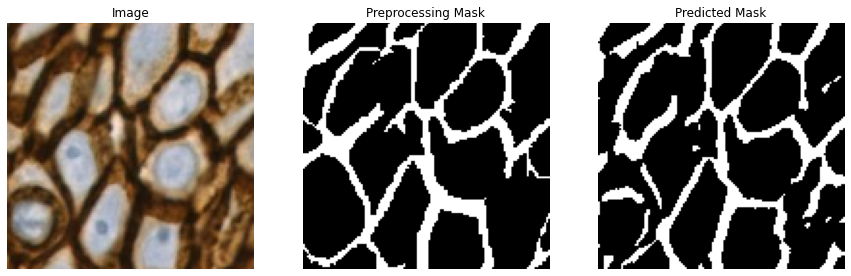

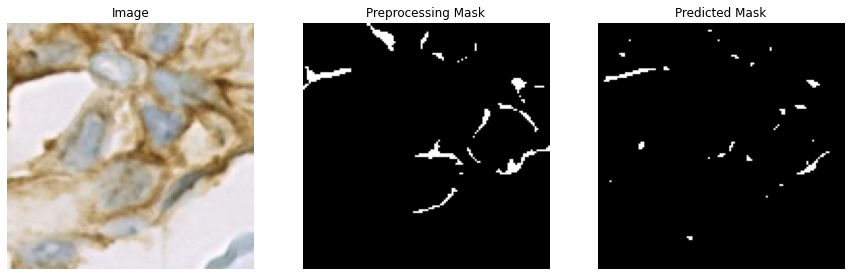

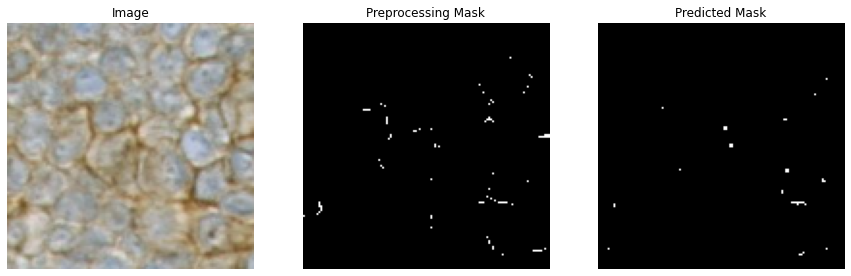

In [16]:
import os
import skimage
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

img_dir = "imgs/exp1-initial-dataset"

imgs = sorted([os.path.join(img_dir, fname) for fname in os.listdir(img_dir) if fname.startswith("o") 
                          and fname.endswith(".png")])
masks = sorted([os.path.join(img_dir, fname) for fname in os.listdir(img_dir) if fname.startswith("m") 
                          and fname.endswith(".png")])
predicted = sorted([os.path.join(img_dir, fname) for fname in os.listdir(img_dir) if fname.startswith("p") 
                          and fname.endswith(".png")])

for i in range(len(imgs)):
    fig, arr = plt.subplots(1, 3, figsize=(15, 15))
    arr[0].imshow(skimage.io.imread(imgs[i]))
    arr[0].axis('off')
    arr[0].set_title('Image')
    arr[1].imshow(skimage.io.imread(masks[i]))
    arr[1].axis('off')
    arr[1].set_title('Preprocessing Mask')
    arr[2].imshow(skimage.io.imread(predicted[i]))
    arr[2].axis('off')
    arr[2].set_title('Predicted Mask')

## Confusion matrix

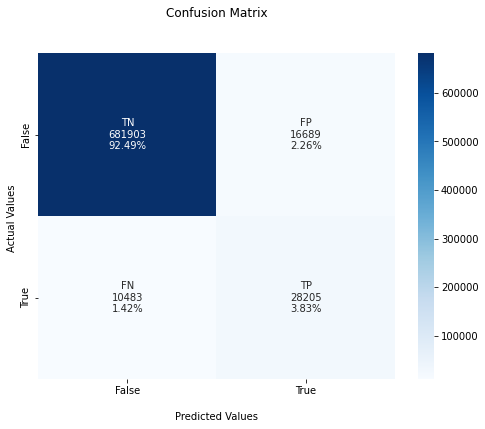

In [46]:
import seaborn as sns

tp = multi.loc[multi['F1-Score'] == multi['F1-Score'].max(), 'TP'].iloc[0]
fp = multi.loc[multi['F1-Score'] == multi['F1-Score'].max(), 'FP'].iloc[0]
tn = multi.loc[multi['F1-Score'] == multi['F1-Score'].max(), 'TN'].iloc[0]
fn = multi.loc[multi['F1-Score'] == multi['F1-Score'].max(), 'FN'].iloc[0]

cm = np.array([[tn, fp],[fn, tp]])

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
fig.savefig('cfm_best1.png')